In [6]:
import numpy as np


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data = np.load('/content/drive/My Drive/QG_jets.npz')

In [12]:
print(data["X"][:2])

[[[ 2.68769142e-01  3.56903171e-01  4.74138734e+00  2.20000000e+01]
  [ 1.60076377e-01 -2.55609533e-01  4.55022910e+00  2.20000000e+01]
  [ 1.14868731e+00 -6.24380156e-02  4.50385377e+00 -2.11000000e+02]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 1.21266321e+00 -1.12853089e-01  3.04708757e+00 -2.11000000e+02]
  [ 2.40893976e-01 -1.67174886e-02  2.82705667e+00  2.20000000e+01]
  [ 1.02778452e-01 -8.58720522e-02  3.04180579e+00  2.20000000e+01]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]]


In [16]:
import numpy as np

# Assuming data["X"] is the array of jets and y is the labels (0 for gluon, 1 for quark)

# Number of jets (samples) and particles per jet
num_jets, num_particles, num_features = data["X"].shape

# Initialize arrays to hold the aggregated features for each jet
mean_pT = np.mean(data["X"][:, :, 0], axis=1)  # Mean p_T
mean_rapidity = np.mean(data["X"][:, :, 1], axis=1)  # Mean rapidity
mean_phi = np.mean(data["X"][:, :, 2], axis=1)  # Mean azimuthal angle
mean_PDG_ID = np.mean(data["X"][:, :, 3], axis=1)  # Mean PDG ID

# Combine these aggregated features into one array for visualization
jet_features = np.column_stack([mean_pT, mean_rapidity, mean_phi, mean_PDG_ID])


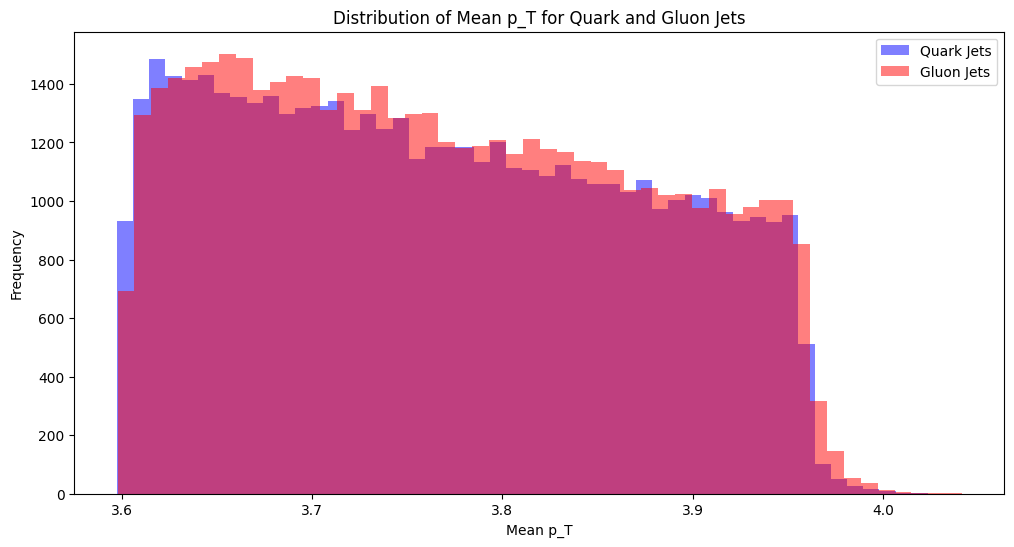

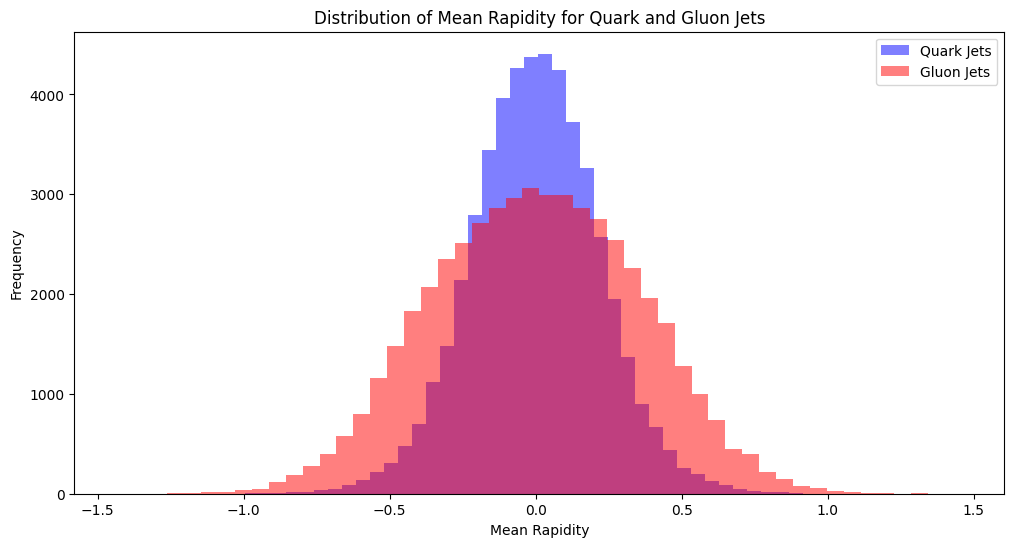

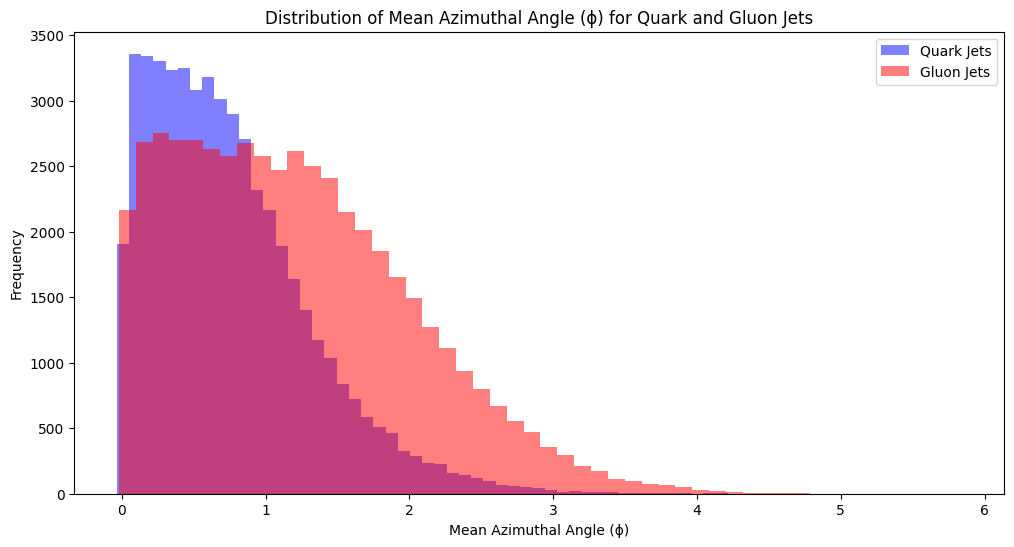

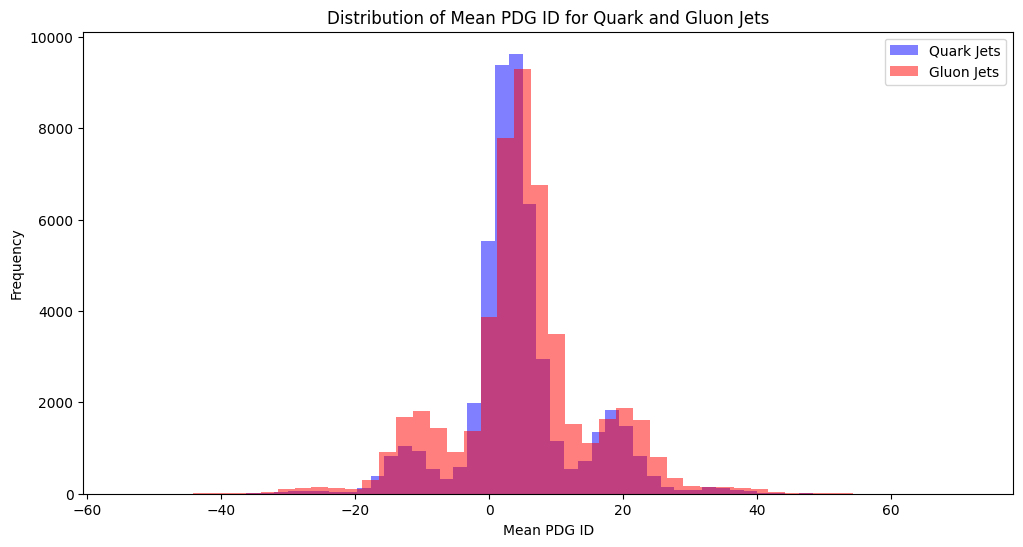

In [19]:
import matplotlib.pyplot as plt

# Let's plot histograms of each feature for quark vs gluon jets
quark_indices = data["y"] == 1
gluon_indices = data["y"] == 0

# Plot mean p_T distribution
plt.figure(figsize=(12, 6))
plt.hist(mean_pT[quark_indices], bins=50, alpha=0.5, label='Quark Jets', color='blue')
plt.hist(mean_pT[gluon_indices], bins=50, alpha=0.5, label='Gluon Jets', color='red')
plt.xlabel('Mean p_T')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Mean p_T for Quark and Gluon Jets')
plt.show()

# Plot mean rapidity distribution
plt.figure(figsize=(12, 6))
plt.hist(mean_rapidity[quark_indices], bins=50, alpha=0.5, label='Quark Jets', color='blue')
plt.hist(mean_rapidity[gluon_indices], bins=50, alpha=0.5, label='Gluon Jets', color='red')
plt.xlabel('Mean Rapidity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Mean Rapidity for Quark and Gluon Jets')
plt.show()

# Plot mean azimuthal angle distribution
plt.figure(figsize=(12, 6))
plt.hist(mean_phi[quark_indices], bins=50, alpha=0.5, label='Quark Jets', color='blue')
plt.hist(mean_phi[gluon_indices], bins=50, alpha=0.5, label='Gluon Jets', color='red')
plt.xlabel('Mean Azimuthal Angle (ϕ)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Mean Azimuthal Angle (ϕ) for Quark and Gluon Jets')
plt.show()

# Plot mean PDG ID distribution
plt.figure(figsize=(12, 6))
plt.hist(mean_PDG_ID[quark_indices], bins=50, alpha=0.5, label='Quark Jets', color='blue')
plt.hist(mean_PDG_ID[gluon_indices], bins=50, alpha=0.5, label='Gluon Jets', color='red')
plt.xlabel('Mean PDG ID')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Mean PDG ID for Quark and Gluon Jets')
plt.show()


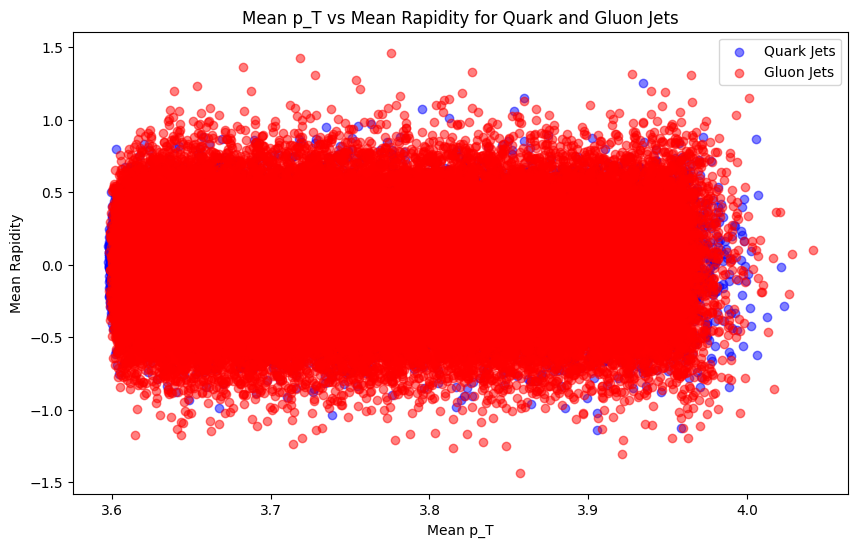

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_pT[quark_indices], mean_rapidity[quark_indices], color='blue', label='Quark Jets', alpha=0.5)
plt.scatter(mean_pT[gluon_indices], mean_rapidity[gluon_indices], color='red', label='Gluon Jets', alpha=0.5)
plt.xlabel('Mean p_T')
plt.ylabel('Mean Rapidity')
plt.legend()
plt.title('Mean p_T vs Mean Rapidity for Quark and Gluon Jets')
plt.show()


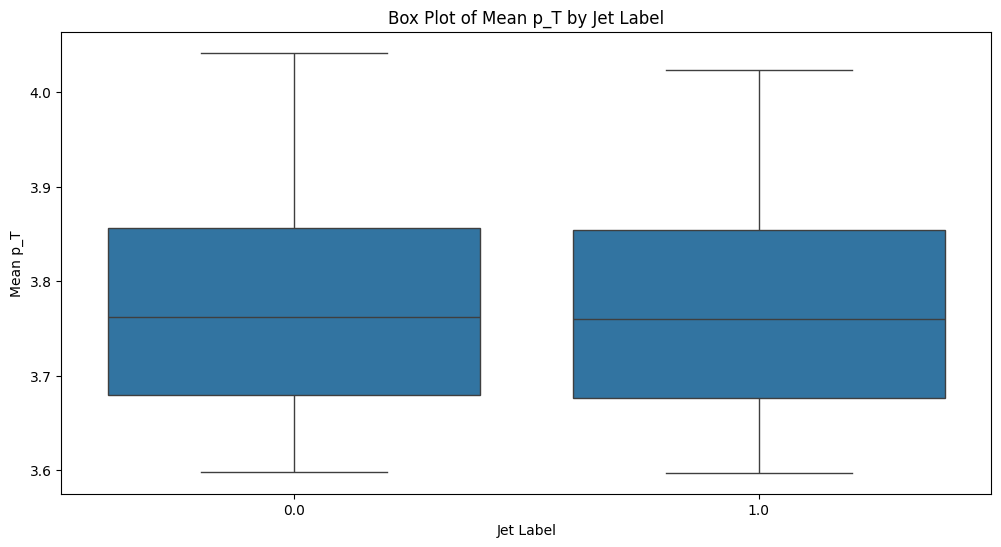

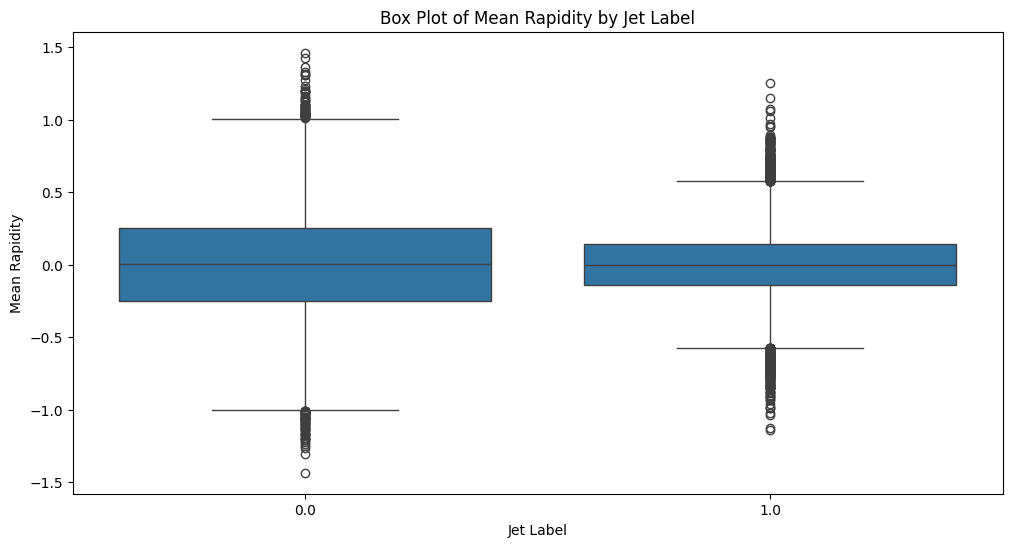

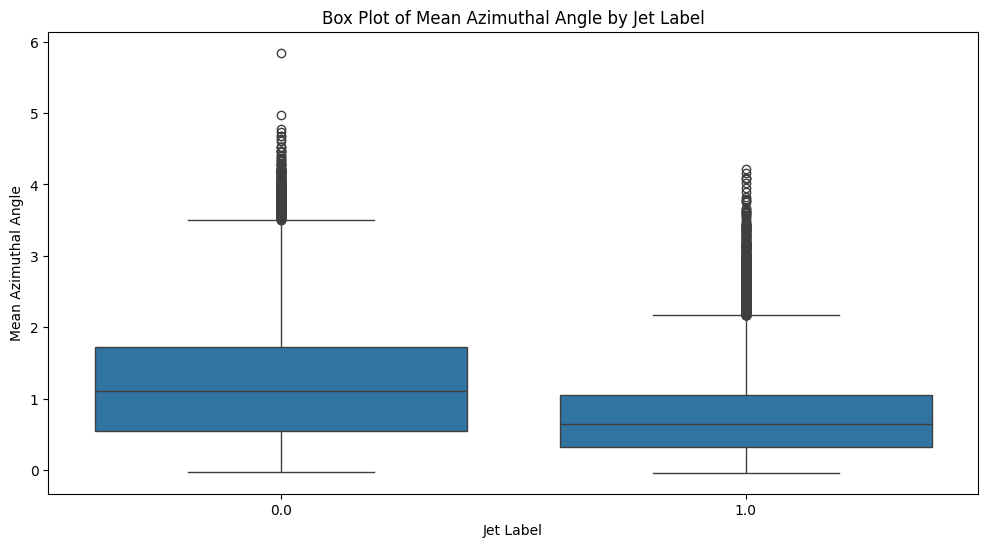

In [21]:
import seaborn as sns
import pandas as pd

# Combine features and labels for boxplot visualization
data_for_boxplot = pd.DataFrame(jet_features, columns=['Mean p_T', 'Mean Rapidity', 'Mean Azimuthal Angle', 'Mean PDG ID'])
data_for_boxplot['Jet Label'] = data["y"]

# Box plot of the features by jet label
plt.figure(figsize=(12, 6))
sns.boxplot(x='Jet Label', y='Mean p_T', data=data_for_boxplot)
plt.title('Box Plot of Mean p_T by Jet Label')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Jet Label', y='Mean Rapidity', data=data_for_boxplot)
plt.title('Box Plot of Mean Rapidity by Jet Label')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Jet Label', y='Mean Azimuthal Angle', data=data_for_boxplot)
plt.title('Box Plot of Mean Azimuthal Angle by Jet Label')
plt.show()


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming `data` is already defined somewhere with X and y
X = data["X"]  # Features
y = data["y"]  # Labels

# Ensure that X and y have the same number of samples
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Check for missing values (if any)
if X.shape[0] != y.shape[0]:
    raise ValueError(f"Number of samples in X ({X.shape[0]}) does not match number of samples in y ({y.shape[0]})")

# Reshape X from (100000, 139, 4) to (100000, 139*4)
X_reshaped = X.reshape(X.shape[0], -1)  # This will give shape (100000, 556)

# Feature scaling (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_reshaped)  # Scale the reshaped features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Shape of X: (100000, 139, 4)
Shape of y: (100000,)
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79     10000
         1.0       0.81      0.74      0.77     10000

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000

Accuracy: 0.7798
